In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = {
    'x': np.arange(1,11),
    'y': [0,0,0,0,0,1,1,1,1,1]
}
df = pd.DataFrame(data)

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [5]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()
en = ElasticNet()

In [6]:
lr.fit(df[['x']], df['y'])
rd.fit(df[['x']], df['y'])
ls.fit(df[['x']], df['y'])
en.fit(df[['x']], df['y'])

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
df['LR'] = lr.predict(df[['x']])
df['RD'] = rd.predict(df[['x']])
df['LS'] = ls.predict(df[['x']])
df['EN'] = en.predict(df[['x']])
df

,x,y,LR,RD,LS,EN
0,1,0,-0.181818,-0.173653,0.363636,0.114286
1,2,0,-0.030303,-0.023952,0.393939,0.200000
2,3,0,0.121212,0.125749,0.424242,0.285714
3,4,0,0.272727,0.275449,0.454545,0.371429
4,5,0,0.424242,0.425150,0.484848,0.457143
5,6,1,0.575758,0.574850,0.515152,0.542857
6,7,1,0.727273,0.724551,0.545455,0.628571
7,8,1,0.878788,0.874251,0.575758,0.714286
8,9,1,1.030303,1.023952,0.606061,0.800000
9,10,1,1.181818,1.173653,0.636364,0.885714


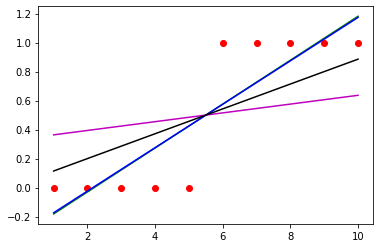

In [23]:
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['LR'],'g-')
plt.plot(df['x'],df['RD'],'b-')
plt.plot(df['x'],df['LS'],'m-')
plt.plot(df['x'],df['EN'],'k-')

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from  sklearn.pipeline import make_pipeline

In [21]:
pipe = make_pipeline(PolynomialFeatures(10, include_bias=False), LinearRegression())
pipe.fit(df[['x']],df['y'])
df['y"poly'] = pipe.predict(df[['x']])

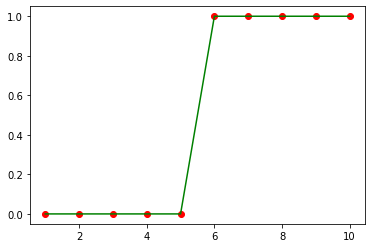

In [22]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"poly'], 'g-')

In [35]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(solver='liblinear')
logR.fit(df[['x']],df['y'])
df['log R'] = logR.predict(df[['x']])
df

,x,y,LR,RD,LS,EN,"y""poly",log R
0,1,0,-0.181818,-0.173653,0.363636,0.114286,5.723571e-07,0
1,2,0,-0.030303,-0.023952,0.393939,0.200000,4.150640e-07,0
2,3,0,0.121212,0.125749,0.424242,0.285714,2.831594e-07,0
3,4,0,0.272727,0.275449,0.454545,0.371429,1.634953e-07,1
4,5,0,0.424242,0.425150,0.484848,0.457143,2.186061e-08,1
5,6,1,0.575758,0.574850,0.515152,0.542857,9.999998e-01,1
6,7,1,0.727273,0.724551,0.545455,0.628571,9.999997e-01,1
7,8,1,0.878788,0.874251,0.575758,0.714286,9.999995e-01,1
8,9,1,1.030303,1.023952,0.606061,0.800000,9.999995e-01,1
9,10,1,1.181818,1.173653,0.636364,0.885714,1.000000e+00,1


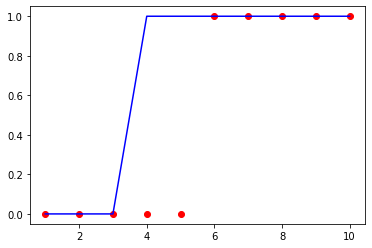

In [36]:
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['log R'],'b-')